In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [62]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    f1_score,
    fbeta_score,
    precision_recall_fscore_support,
    precision_recall_curve
)

from scipy import stats


<IPython.core.display.Javascript object>

In [3]:
data_loc = "data/shuttle.trn"

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv(data_loc, sep=" ", header=None)

<IPython.core.display.Javascript object>

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       43500 non-null  int64
 1   1       43500 non-null  int64
 2   2       43500 non-null  int64
 3   3       43500 non-null  int64
 4   4       43500 non-null  int64
 5   5       43500 non-null  int64
 6   6       43500 non-null  int64
 7   7       43500 non-null  int64
 8   8       43500 non-null  int64
 9   9       43500 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


<IPython.core.display.Javascript object>

In [7]:
df[9].value_counts()

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: 9, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
bin_df = df.copy()
bin_df.loc[bin_df[9] == 1, 10] = "positive"
bin_df.loc[bin_df[9] > 1, 10] = "negative"

<IPython.core.display.Javascript object>

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


<IPython.core.display.Javascript object>

In [10]:
bin_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,50,21,77,0,28,0,27,48,22,2,negative
1,55,0,92,0,0,26,36,92,56,4,negative
2,53,0,82,0,52,-5,29,30,2,1,positive
3,37,0,76,0,28,18,40,48,8,1,positive
4,37,0,79,0,34,-26,43,46,2,1,positive


<IPython.core.display.Javascript object>

In [11]:
X = bin_df.drop(columns=[9, 10])
y = bin_df[10]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=34
)

<IPython.core.display.Javascript object>

In [12]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [13]:
model.score(X_train, y_train)

0.9715229885057471

<IPython.core.display.Javascript object>

In [14]:
model.score(X_test, y_test)

0.9689655172413794

<IPython.core.display.Javascript object>

In [15]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

<IPython.core.display.Javascript object>

In [16]:
dummy.score(X_train, y_train)

0.6595689655172414

<IPython.core.display.Javascript object>

In [17]:
dummy.score(X_test, y_test)
# Dummy is significantly worse. We are better than a coin flip at least

0.6616091954022989

<IPython.core.display.Javascript object>

In [18]:
y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

In [19]:
confusion = confusion_matrix(y_test, y_pred)

<IPython.core.display.Javascript object>

In [20]:
def plot_confusion_matrix(
    cm, target_names, title="Confusion matrix", cmap=None, normalize=True
):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(
        "Predicted label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
    )
    plt.show()

<IPython.core.display.Javascript object>

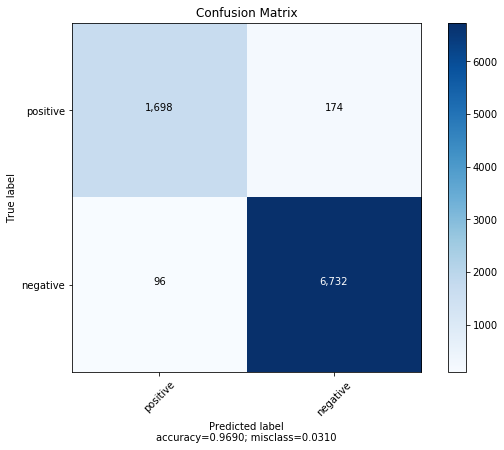

<IPython.core.display.Javascript object>

In [21]:
plot_confusion_matrix(cm=confusion, target_names = ['positive', 'negative'], title = 'Confusion Matrix',normalize=False)


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.95      0.91      0.93      1872
    positive       0.97      0.99      0.98      6828

    accuracy                           0.97      8700
   macro avg       0.96      0.95      0.95      8700
weighted avg       0.97      0.97      0.97      8700



<IPython.core.display.Javascript object>

In [35]:
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred)
print(fbeta)

[0.92635025 0.98034076]


<IPython.core.display.Javascript object>

In [ ]:
y_prob = model.predict_proba(X_test)

In [38]:
y_prob

array([[4.14296608e-01, 5.85703392e-01],
       [2.18056954e-01, 7.81943046e-01],
       [6.31665070e-04, 9.99368335e-01],
       ...,
       [1.56229127e-03, 9.98437709e-01],
       [6.24981409e-03, 9.93750186e-01],
       [4.73984811e-02, 9.52601519e-01]])

<IPython.core.display.Javascript object>

In [44]:
yprob_neg = y_prob[:, 0]
yprob_pos = y_prob[:, 1]

<IPython.core.display.Javascript object>

In [45]:
roc_auc_score(y_test == "positive", yprob_pos)

0.9914742713512483

<IPython.core.display.Javascript object>

In [46]:
roc_auc_score(y_test == "negative", yprob_neg)

0.9914742713512485

<IPython.core.display.Javascript object>

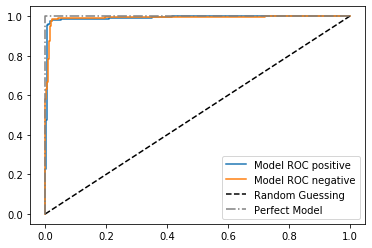

<IPython.core.display.Javascript object>

In [47]:
pos_fpr, pos_tpr, _ = roc_curve(y_test == "positive", yprob_pos)
neg_fpr, neg_tpr, _ = roc_curve(y_test == "negative", yprob_neg)


plt.plot(pos_fpr, pos_tpr, label="Model ROC positive")
plt.plot(neg_fpr, neg_tpr, label="Model ROC negative")
plt.plot([0, 1], [0, 1], "--", c="black", label="Random Guessing")
plt.plot([0, 0, 1], [0, 1, 1], "-.", c="gray", label="Perfect Model")
plt.legend()
plt.show()

In [69]:
pres, rec, thresholds = precision_recall_curve(y_test, y_pred, pos_label="positive")
fig = plt.figure(figsize=(6, 6))
plt.plot(rec, pres)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<IPython.core.display.Javascript object>

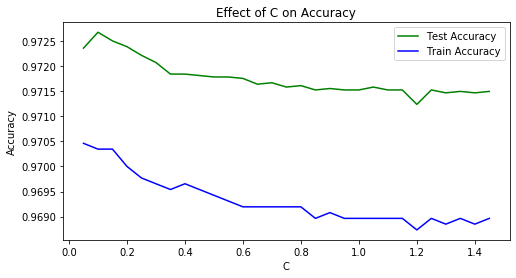

<IPython.core.display.Javascript object>

In [53]:
# answer goes here

c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression( solver = 'lbfgs',C=c, max_iter=500)
    lr.fit(X_train, y_train)
    train_score= lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    test_accuracy.append(train_score.mean())
    train_accuracy.append(test_score.mean())
#     print('done')

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()

#looks like the best might be 0.05

In [54]:
model = LogisticRegression(solver="lbfgs", C=0.05, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [58]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)


NameError: name 'cv' is not defined

<IPython.core.display.Javascript object>

In [59]:
print(cv_scores, cv_scores.mean())

[0.97068966 0.97255747 0.97341954 0.97298851 0.96968391] 0.9718678160919542


<IPython.core.display.Javascript object>

In [70]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)

print("Accuracy of KNN (k = 7): {:.3f}".format(knn_7_score))

Accuracy of KNN (k = 7): 0.998


<IPython.core.display.Javascript object>

In [71]:
rf = RandomForestClassifier(n_estimators=22, random_state=40)

rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)

print("Accuracy of Random Forest: {:.3f}".format(rf_score))

Accuracy of Random Forest: 1.000


<IPython.core.display.Javascript object>

In [73]:
p = (9) / (9 + 3)
r = (9) / (9 + 2)

f1 = 2 * ((p * r) / (p + r))
f1

0.7826086956521738

<IPython.core.display.Javascript object>